In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/Video_Games_Sales.csv')
data = data[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher']]

FileNotFoundError: [Errno 2] File b'../data/Video_Games_Sales.csv' does not exist: b'../data/Video_Games_Sales.csv'

### Deal with missing values

In [ ]:
data = data.dropna(subset = ['Name'])

In [3]:
data = data.fillna(value = '')

NameError: name 'data' is not defined

### Preprocessing

In [5]:
# data[['Name_', 'Platform_', 'Genre_', 'Publisher_']] = data[['Name', 'Platform', 'Genre', 'Publisher']].applymap(lambda x: x.lower())

In [30]:
data = data[ ~ data.duplicated()]

In [8]:
data.to_csv("../data/Catelog.csv", index = False)

In [72]:
data['Name'] = data['Name'].str.strip()

In [73]:
data.to_csv("../data/VideoGameGatelog.csv", index = False)

In [51]:
# import pickle
# with open(r"VideoGameGatelog.pickle", "wb") as file:
#     pickle.dump(data, file)

In [74]:
platform_df = pd.DataFrame(data.groupby('Name')['Platform'].apply(lambda x: "%s" % ' '.join(x)))
genre_df = pd.DataFrame(data.groupby('Name')['Genre'].apply(lambda x: "%s" % ' '.join(x)))
df = pd.merge(platform_df, genre_df, on = 'Name')
df

,Platform,Genre
Name,,
'98 Koshien,PS,Sports
.hack//G.U. Vol.1//Rebirth,PS2,Role-Playing
.hack//G.U. Vol.2//Reminisce,PS2,Role-Playing
.hack//G.U. Vol.2//Reminisce (jp sales),PS2,Role-Playing
.hack//G.U. Vol.3//Redemption,PS2,Role-Playing
.hack//Infection Part 1,PS2,Role-Playing
.hack//Link,PSP,Role-Playing
.hack//Mutation Part 2,PS2,Role-Playing
.hack//Outbreak Part 3,PS2,Role-Playing


In [75]:
df = df.merge(data[['Name', 'Publisher']], on = 'Name', how = 'left')

Create a column called **meta** merged info from **genre, platform, publisher**.

In [76]:
df['metadata'] = df[['Publisher', 'Platform', 'Genre']].apply(lambda x: ' '.join(x), axis = 1)

## Create a content latent matrix from metadata

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
count_matrix = count.fit_transform(df['metadata'])

In [78]:
columns = count.get_feature_names()

In [79]:
count_df = pd.DataFrame(count_matrix.toarray(), index = df.Name.tolist(), columns = columns)

In [80]:
count_df.shape

(16716, 692)

### Dimensionality reduction

In [91]:
from sklearn.decomposition import TruncatedSVD

#Apply SVD
svd = TruncatedSVD(n_components = 50)
latent_df = svd.fit_transform(count_df)

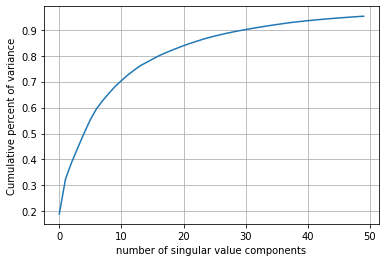

In [92]:
# Plot variance as a function of the number of components.
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [93]:
n= 30
latent_df = pd.DataFrame(latent_df[:, 0:n], index = df.Name.tolist())
latent_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
'98 Koshien,0.143838,0.917876,-0.261399,0.078869,0.020959,-0.043884,-0.055610,-0.045088,-0.018804,-0.005092,...,0.019072,0.465481,-0.217128,-0.120598,0.487599,-0.117599,-0.032130,0.070163,-0.067241,0.063246
.hack//G.U. Vol.1//Rebirth,0.197674,0.230828,0.557246,-0.793942,1.111848,-0.537975,0.236654,-0.452144,0.610823,0.163100,...,-0.038390,-0.280643,-0.175204,-0.136370,0.168246,0.236124,0.113721,0.081178,0.237092,-0.125580
.hack//G.U. Vol.2//Reminisce,0.197674,0.230828,0.557246,-0.793942,1.111848,-0.537975,0.236654,-0.452144,0.610823,0.163100,...,-0.038390,-0.280643,-0.175204,-0.136370,0.168246,0.236124,0.113721,0.081178,0.237092,-0.125580
.hack//G.U. Vol.2//Reminisce (jp sales),0.197674,0.230828,0.557246,-0.793942,1.111848,-0.537975,0.236654,-0.452144,0.610823,0.163100,...,-0.038390,-0.280643,-0.175204,-0.136370,0.168246,0.236124,0.113721,0.081178,0.237092,-0.125580
.hack//G.U. Vol.3//Redemption,0.197674,0.230828,0.557246,-0.793942,1.111848,-0.537975,0.236654,-0.452144,0.610823,0.163100,...,-0.038390,-0.280643,-0.175204,-0.136370,0.168246,0.236124,0.113721,0.081178,0.237092,-0.125580
.hack//Infection Part 1,0.149067,0.207125,0.446753,-0.659013,1.051602,-0.474663,0.166590,-0.551041,0.354205,-0.104837,...,-0.150871,-0.255041,-0.131702,-0.085244,0.284880,0.179881,0.124129,0.136200,0.141705,0.081242
.hack//Link,0.153525,0.157207,0.448155,-0.793174,1.181670,-0.556706,0.047390,-0.035627,0.334464,0.227454,...,0.370910,0.115216,0.047997,0.009543,-0.095419,0.030882,-0.042270,-0.145523,0.115422,-0.171100
.hack//Mutation Part 2,0.149067,0.207125,0.446753,-0.659013,1.051602,-0.474663,0.166590,-0.551041,0.354205,-0.104837,...,-0.150871,-0.255041,-0.131702,-0.085244,0.284880,0.179881,0.124129,0.136200,0.141705,0.081242
.hack//Outbreak Part 3,0.149067,0.207125,0.446753,-0.659013,1.051602,-0.474663,0.166590,-0.551041,0.354205,-0.104837,...,-0.150871,-0.255041,-0.131702,-0.085244,0.284880,0.179881,0.124129,0.136200,0.141705,0.081242
.hack//Quarantine Part 4: The Final Chapter,0.149067,0.207125,0.446753,-0.659013,1.051602,-0.474663,0.166590,-0.551041,0.354205,-0.104837,...,-0.150871,-0.255041,-0.131702,-0.085244,0.284880,0.179881,0.124129,0.136200,0.141705,0.081242


### Check latent_df and data saved in pickle

In [103]:
latent_df.to_csv("../data/latent_df.csv")

In [106]:
pd.read_csv('../data/latent_df.csv').set_index('Unnamed: 0')

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
'98 Koshien,0.143838,0.917876,-0.261399,0.078869,0.020959,-0.043884,-0.055610,-0.045088,-0.018804,-0.005092,...,0.019072,0.465481,-0.217128,-0.120598,0.487599,-0.117599,-0.032130,0.070163,-0.067241,0.063246
.hack//G.U. Vol.1//Rebirth,0.197674,0.230828,0.557246,-0.793942,1.111848,-0.537975,0.236654,-0.452144,0.610823,0.163100,...,-0.038390,-0.280643,-0.175204,-0.136370,0.168246,0.236124,0.113721,0.081178,0.237092,-0.125580
.hack//G.U. Vol.2//Reminisce,0.197674,0.230828,0.557246,-0.793942,1.111848,-0.537975,0.236654,-0.452144,0.610823,0.163100,...,-0.038390,-0.280643,-0.175204,-0.136370,0.168246,0.236124,0.113721,0.081178,0.237092,-0.125580
.hack//G.U. Vol.2//Reminisce (jp sales),0.197674,0.230828,0.557246,-0.793942,1.111848,-0.537975,0.236654,-0.452144,0.610823,0.163100,...,-0.038390,-0.280643,-0.175204,-0.136370,0.168246,0.236124,0.113721,0.081178,0.237092,-0.125580
.hack//G.U. Vol.3//Redemption,0.197674,0.230828,0.557246,-0.793942,1.111848,-0.537975,0.236654,-0.452144,0.610823,0.163100,...,-0.038390,-0.280643,-0.175204,-0.136370,0.168246,0.236124,0.113721,0.081178,0.237092,-0.125580
.hack//Infection Part 1,0.149067,0.207125,0.446753,-0.659013,1.051602,-0.474663,0.166590,-0.551041,0.354205,-0.104837,...,-0.150871,-0.255041,-0.131702,-0.085244,0.284880,0.179881,0.124129,0.136200,0.141705,0.081242
.hack//Link,0.153525,0.157207,0.448155,-0.793174,1.181670,-0.556706,0.047390,-0.035627,0.334464,0.227454,...,0.370910,0.115216,0.047997,0.009543,-0.095419,0.030882,-0.042270,-0.145523,0.115422,-0.171100
.hack//Mutation Part 2,0.149067,0.207125,0.446753,-0.659013,1.051602,-0.474663,0.166590,-0.551041,0.354205,-0.104837,...,-0.150871,-0.255041,-0.131702,-0.085244,0.284880,0.179881,0.124129,0.136200,0.141705,0.081242
.hack//Outbreak Part 3,0.149067,0.207125,0.446753,-0.659013,1.051602,-0.474663,0.166590,-0.551041,0.354205,-0.104837,...,-0.150871,-0.255041,-0.131702,-0.085244,0.284880,0.179881,0.124129,0.136200,0.141705,0.081242


## Apply cosine similarity in contant

In [42]:
example = df['Name'][0]

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

# Get the latent vectors fot example
v = np.array(latent_df.loc[example]).reshape(1, -1)

# Compute teh cosine similarity of this game
sim = cosine_similarity(latent_df, v).reshape(-1)

In [85]:
np.array(latent_df.loc['Beyblade Burst']).reshape(1, -1)

array([[ 0.07516572,  0.04793587,  0.28354031, -0.64791107,  1.10811663,
        -0.46580301, -0.068095  , -0.12885299, -0.07585546, -0.0693082 ,
        -0.02564498,  0.00516187, -0.02130607, -0.0494702 , -0.01474354,
        -0.09113676, -0.03785478,  0.0291581 , -0.06289456,  0.22557662,
         0.09301698, -0.01065297,  0.21575321,  0.06824873, -0.10477183,
        -0.24969384,  0.54637898,  0.23462721,  0.31431745,  0.07082033]])

In [86]:
recommendation_df = pd.DataFrame({'content': sim}, index = latent_df.index)
recommendation_df

,content
'98 Koshien,1.000000
.hack//G.U. Vol.1//Rebirth,0.983135
.hack//G.U. Vol.2//Reminisce,0.160256
.hack//G.U. Vol.2//Reminisce (jp sales),0.160256
.hack//G.U. Vol.3//Redemption,0.204315
.hack//Infection Part 1,0.514123
.hack//Link,-0.001902
.hack//Mutation Part 2,0.529278
.hack//Outbreak Part 3,0.529278
.hack//Quarantine Part 4: The Final Chapter,0.529278


In [87]:
recommendation_df.sort_values('content', ascending = False, inplace = True)
recommendation_df.head(10)

,content
'98 Koshien,1.000000
The Legend of Legacy,1.000000
Yokai Watch 2 Shinuchi,0.999996
Inazuma Eleven Strikers,0.999996
Gitaroo Man,0.999996
Medabots 9: Metabee / Rokusho,0.999978
Medabots AX: Metabee,0.999978
Medabots Girls Mission: Metabee Ver. / Rokusho Ver.,0.999978
Medabots: Infinity,0.999978
Medarot DS: Kabuto / Kuwagata Ver.,0.999978


In [88]:
recommendation_df = recommendation_df.reset_index()
top_5 = recommendation_df.merge(data, left_on='index', right_on = 'Name', how = 'left')[['index', 'content', 'Platform', 'Genre', 'Publisher']].head(6)

In [89]:
### top 5 similar to 

print(f"top 5 similar games to {example} are {top_5['index'].tolist()[1:]}")

top 5 similar games to  Beyblade Burst are ['The Legend of Legacy', 'Yokai Watch 2 Shinuchi', 'Inazuma Eleven Strikers', 'Gitaroo Man', 'Medabots 9: Metabee / Rokusho']
